**DIDA 325 Final Project - Energy Dataset:
Mimansa Dahal, Saki Endo, Tim (Tianqi) Jiang, & Kristina Donders**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

##**Introduction**

We are a government agency focusing on increasing energy efficiency. We are researching different types of buildings to see which buildings use the least amount of energy and which buildings use the most energy. Our goal is to find the ideal characteristics that a building needs to have in order to maximize that building’s energy efficiency.

This dataset is interesting due to its relevance to real-world challenges in energy efficiency and sustainability. As society increasingly recognizes the need to adopt energy-conscious practices for the sake of future generations, this dataset provides a tool for building a more sustainable future. By enabling data analysts to identify building features that enhance energy efficiency, it offers actionable insights for architects and engineers to optimize energy consumption and design greener buildings.

This data was collected by Anthanasios Tsanas (University of Oxford) and Angeliki Xifara (Cardiff University). This dataset contains characteristics buildings have such as wall area, glazing area, roof area, height, etc. Our approach to analyzing this dataset includes specific questions about the characteristics of this building and how these characteristics affect the heating and cooling load of these buildings. We will do this by answering the following questions:

1. How accurately can we predict the heating and cooling load based on the data we have about the buildings?

2. What is the relationship between surface area, orientation and the cooling load of a building?

3. What is the relationship between glazing area and energy efficiency?

4. What is the ideal wall area for optimal heating and cooling load?



##**Dataset**

As previously mentioned, this dataset was created by Anthanasios Tsanas (University of Oxford) and Angeliki Xifara (Cardiff University) and is found at the UC Irvine Machine Learning Repository. The rows of this dataset are a little unclear at first glance; we had to spend some time looking through the website to figure out what each of these rows and columns represented.

The rows are set up in a way such that a new building and its characteristics are introduced every 4 rows; this is because each row has a different orientation value (north, east, south, west) for each building. This was unclear at first because the rows do not have any labels and are purely numerical values. The columns contained characteristics about the buildings, so every column was important in determining the effect these characteristics had on the heating and cooling loads.

The important columns are as follows:
1. X1 = Relative Compactness: It measures how compact a building is, a better compactness leads to better energy efficiency. Numeric data
2. X2 = Surface Area: The total surface area of the building, large surface area could lead to higher energy needs. Numeric data measured in meters
3. X3 = Wall Area: The area covered by the wall, large wall area affects heat insulation. Numeric data measured in meters
4. X4 = Roof Area: The area covered by the roof, roof area could affect heat transfer and insulation. Numeric data measured in meters
5. X5 = Overall Height: The height of the building, the higher the building, the more energy is required. Numeric data measured in meters
6. X6 = Orientation: Building’s orientation e.g. (east, north, south, west). Building’s orientation can affect the sun exposure, the building which faces east usually gets more sun exposure therefore less heating needs. Categorical data.
7. X7 = Glazing Area: Areas covered by windows, doors. This could affect the heating and cooling efficiency due to the low insulation. Numeric data measured in meters
8. X8 = Glazing Area Distribution: This distribution of windows and doors in a building. The side with more windows could lead to more sun exposure, less heating needs. Numeric data.
9. Y1 = Heading load: The amount of energy needed to heat a building. Numeric data
10. Y2 = Cooling load: The amount of energy needed to cool a building. Numeric data


##**Analysis**

Analysis for each research question:

In [ ]:
energy = pd.read_excel("/content/ENB2012_data.xlsx")
energy.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


#### **1. How accurately can we predict the heating and cooling load based on the data we have about the buildings?**


In [ ]:
energy.columns
filtered_energy= energy.drop(['X6'],axis=1)
filtered_energy

,X1,X2,X3,X4,X5,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,0.4,5,16.48,16.61


In [ ]:
energy_cleaned = filtered_energy.dropna()
energy_cleaned

,X1,X2,X3,X4,X5,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,0.4,5,16.48,16.61


In [ ]:
#linear regression for heating load, or Y1
X= energy_cleaned[['X1', 'X2', 'X3','X4','X5','X7','X8']]
y= energy_cleaned['Y1']

X = pd.get_dummies(X, drop_first=True).astype("float32")
X.head()

,X1,X2,X3,X4,X5,X7,X8
0,0.98,514.5,294.0,110.25,7.0,0.0,0.0
1,0.98,514.5,294.0,110.25,7.0,0.0,0.0
2,0.98,514.5,294.0,110.25,7.0,0.0,0.0
3,0.98,514.5,294.0,110.25,7.0,0.0,0.0
4,0.90,563.5,318.5,122.50,7.0,0.0,0.0


In [ ]:
#linear regression for heating load, or Y1
X = sm.tools.tools.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     Y1   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     1387.
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        01:56:36   Log-Likelihood:                -1912.5
No. Observations:                 768   AIC:                             3839.
Df Residuals:                     761   BIC:                             3871.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.9316     19.019      4.413      0.0

**Observations:**

* R-squared = 0.916 suggests that the independent variables have high predictive power for dependent variable.

* The regression line fits the model very well.

* For each independent variables, the p values are less than 0.05, which suggests that every independent variables have significant influence on dependent variable.

In [ ]:
#linear regression for cooling load, or Y2
X= energy_cleaned[['X1', 'X2', 'X3','X4','X5','X7','X8']]
y= energy_cleaned['Y2']

X = pd.get_dummies(X, drop_first=True).astype("float32")
X.head(50)

,X1,X2,X3,X4,X5,X7,X8
0,0.98,514.5,294.0,110.25,7.0,0.0,0.0
1,0.98,514.5,294.0,110.25,7.0,0.0,0.0
2,0.98,514.5,294.0,110.25,7.0,0.0,0.0
3,0.98,514.5,294.0,110.25,7.0,0.0,0.0
4,0.90,563.5,318.5,122.50,7.0,0.0,0.0
5,0.90,563.5,318.5,122.50,7.0,0.0,0.0
6,0.90,563.5,318.5,122.50,7.0,0.0,0.0
7,0.90,563.5,318.5,122.50,7.0,0.0,0.0
8,0.86,588.0,294.0,147.00,7.0,0.0,0.0
9,0.86,588.0,294.0,147.00,7.0,0.0,0.0


In [ ]:
#linear regression for cooling load, or Y2
X = sm.tools.tools.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     Y2   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1002.
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        01:56:36   Log-Likelihood:                -1980.0
No. Observations:                 768   AIC:                             3974.
Df Residuals:                     761   BIC:                             4007.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.6709     20.767      4.703      0.0

**Observations:**

* Result: R-squared = 0.888 suggests that the independent variables have high predictive power for cooling.

* The regression line fits the model very well.

* For each independent variables except X8, the p values are less than 0.05, which suggests that these independent variables have significant influence on cooling

####**2. What is the relationship between surface area, orientation and the cooling/heating load of a building**

In [ ]:
#renaming the orientations to their respective names to make it easier for readers to understand
energy.loc[energy['X6'] == 2, 'X6'] = 'north'
energy.loc[energy['X6'] == 3, 'X6'] = 'east'
energy.loc[energy['X6'] == 4, 'X6'] = 'south'
energy.loc[energy['X6'] == 5, 'X6'] = 'west'

<ipython-input-9-805bf6a0f78b>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'north' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  energy.loc[energy['X6'] == 2, 'X6'] = 'north'


<ipython-input-10-020a12ed9a94>:1: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(energy,x="X2",y="Y2", hue="X6",palette=sns.color_palette("Set2"))


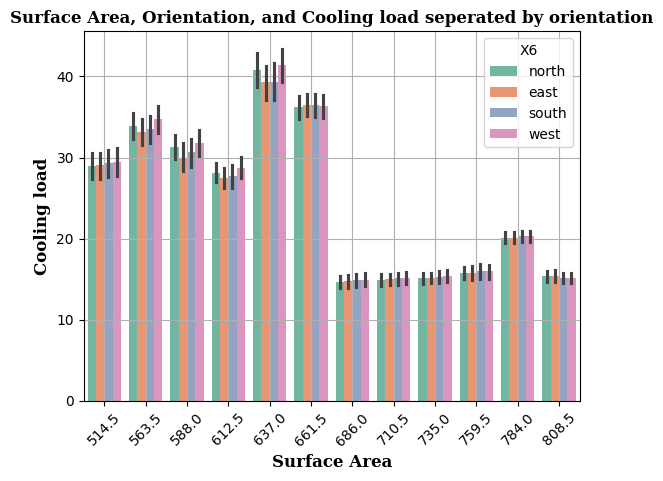

In [ ]:
sns.barplot(energy,x="X2",y="Y2", hue="X6",palette=sns.color_palette("Set2"))
newfont = {'fontname': 'serif', 'fontsize': 12,'fontweight': 'bold'}
plt.title('Surface Area, Orientation, and Cooling load seperated by orientation',fontdict=newfont)
plt.xlabel("Surface Area",fontdict=newfont)
plt.ylabel("Cooling load",fontdict=newfont)
plt.xticks(rotation=45)
plt.grid()
plt.show()

<ipython-input-11-0b7bb7e60f83>:1: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(energy,x="X2",y="Y1", hue="X6",palette=sns.color_palette("Set2"))


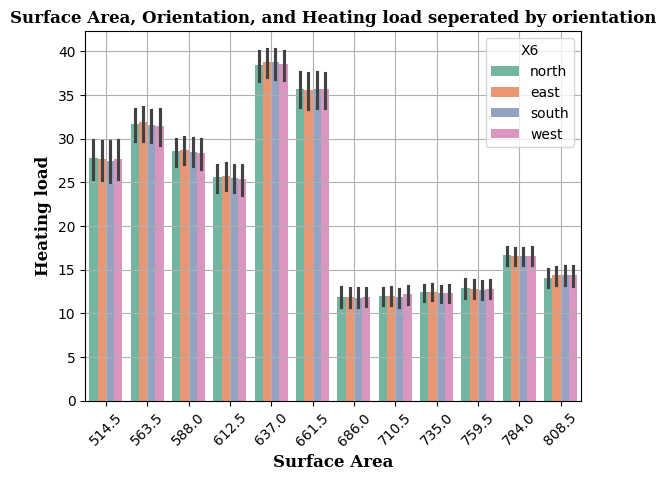

In [ ]:
sns.barplot(energy,x="X2",y="Y1", hue="X6",palette=sns.color_palette("Set2"))
newfont = {'fontname': 'serif', 'fontsize': 12,'fontweight': 'bold'}
plt.title('Surface Area, Orientation, and Heating load seperated by orientation',fontdict=newfont)
plt.xlabel("Surface Area",fontdict=newfont)
plt.ylabel("Heating load",fontdict=newfont)
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Note**

* The vertical line on the barplot represents the standard deviation; the range of values.

**Observations from graphs**
*   The graph shows that a larger surface area tends to result in a lower heating/cooling load.
*   There seems to be no significant difference in heating/cooling load between different orientations.
* Standard deviation of heating/cooling load decreases as the surface area increases, indicating that larger surface areas lead to predictable energy performance
* As surface area increases, external factors (e.g., orientation, grazing area) have less influence on energy efficiency. Larger buildings may be less sensitive to these variations due to a more uniform heat distribution or other structural factors.

###**3. What is the relationship between glazing area and energy efficiency**

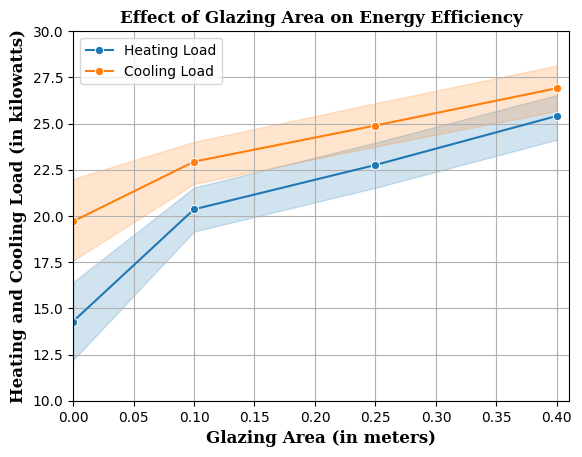

In [ ]:
sns.lineplot(data=energy, x="X7", y="Y1", label='Heating Load', marker='o')
sns.lineplot(data=energy, x="X7", y="Y2", label='Cooling Load', marker='o')
newfont = {'fontname': 'serif', 'fontsize': 12,'fontweight': 'bold'}
plt.xlim(0,.41)
plt.ylim(10,30)
plt.grid()
plt.title('Effect of Glazing Area on Energy Efficiency', fontdict=newfont)
plt.xlabel('Glazing Area (in meters)', fontdict=newfont)
plt.ylabel('Heating and Cooling Load (in kilowatts)', fontdict=newfont)
plt.legend(loc="upper left")
plt.show()

**note:**
 * The glazing area for this dataset is the amount of area covered by windows or doors; this could affect the heating and cooling efficiency due to the low insulation.

 * The shading around the lines accounts for the same x value having multiple y values.


**Observations from graph:**

 * The graph shows that an increase in glazing area causes an increase in the energy uses for both heating and cooling loads, leading to lower energy efficiency.**

 * **We want to minimize the number of doors and windows to cut down on energy usage.

### **4. What is the ideal wall area for optimal heating and cooling load?**

In [ ]:
energy['midpoint'] = (energy['Y1']+energy['Y2'])/2

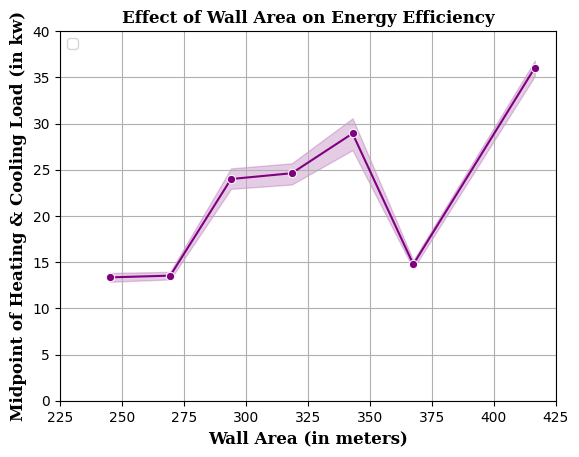

In [ ]:
#graph showing the effect of wall area on energy efficiency:
sns.lineplot(data=energy, x="X3", y="midpoint", marker='o', color='purple')
newfont = {'fontname': 'serif', 'fontsize': 12,'fontweight': 'bold'}
plt.xlim(225,425)
plt.ylim(0,40)
plt.grid()
plt.title('Effect of Wall Area on Energy Efficiency', fontdict=newfont)
plt.xlabel('Wall Area (in meters)', fontdict=newfont)
plt.ylabel('Midpoint of Heating & Cooling Load (in kw)', fontdict=newfont)
plt.legend(loc="upper left")
plt.show()

In [ ]:
#finding the lowest midpoint between heating a cooling load:
lowest = energy['midpoint'].min()
lowest

8.475

In [ ]:
#finding the ideal wall area at the minimum heating at cooling load by locating the area of the wall at the midpoint of the lowest heating and cooling load:
energy['X3'].loc[energy['midpoint']<=lowest]

,X3
26,245.0


**Observations:**

* The ideal wall area for optimal heating and cooling load is 245 m^2.
* This was found by finding the midpoint between the heating and cooling load at each wall area. This would be the optimal heating and cooling load. Then, we found the wall area where the heating and cooling load midpoint was at its lowest. This would be the ideal wall area for optimal heating and cooling load.

##**Conclusion**

Conclusions for each analysis:

#### **1. How accurately can we predict the heating and cooling load based on the data we have about the buildings?**

The linear regression model shows that the independent variables have a strong predictive power for the dependent variables, the heating and cooling loads, as indicated by the R-squared values of 0.916 and 0.888, respectively.

This suggests that the regression model does a good job of predicting the outcomes for both the cooling and heating variables. Moreover, the p value for almost all of the (the exception being X8, the glazing area distribution, for Y2 or cooling load) independent variables is less than 0.05, which indicates that these independent variables are statistically significant in the prediction of the dependent variables. As mentioned, in the cooling model, the variable X8 has p value greater than 0.05, suggesting no significant impact on cooling prediction.

I believe that this analysis was effective; creating linear regression models is an effective way to explain relationships within this dataset. This analysis could have been improved if we had more variables or details of the building in this dataset.


####**2. What is the relationship between surface area, orientation and the cooling/heating load of a building**

To analyze the relationship between surface area, orientation, and the cooling & heating loads of a building, I created a bar graph that illustrates these relationships. This bar graph revealed that there is an inverse relationship between surface area and heating & cooling loads; a larger surface area generally corresponds to a lower heating/cooling load. This means that there is a linear relationship between the surface area, orientation, and the cooling & heating load of these buildings (as cooling and heating loads go down, energy efficiency increases).

However, the differences across orientations appear to be minimal; the orientation of the building doesn’t have a significant impact on the heating and cooling loads. Additionally, we observed that as surface area increases, the standard deviation of heating/cooling loads decreases. This suggests that buildings with larger surface areas exhibit more consistent and predictable energy efficiency.

I believe this analysis was effective; however, it could be improved with additional information, such as the location. This is because the graph currently compares only surface area, while factors like location and average climate definitely have a significant impact on heating and cooling loads.


###**3. What is the relationship between glazing area and energy efficiency**

There is an inverse relationship between the glazing area (amount of area covered by windows or doors) and energy efficiency. As the value of the glazing area increases, the energy efficiency decreases; and vice versa.
We found this by creating a graph that showed the relationship between the heating load and cooling load (measured in kilowatts), and glazing area (measured in meters).
This graph showed us that there is a linear relationship between these variables; an increase in glazing area causes an increase in the energy usage for both heating and cooling loads. Thus, as energy usage increases, the energy efficiency decreases.
I believe that this analysis was effective in answering this question. The dataset could have been improved if it had a larger range of values for the glazing areas; this would've allowed me to analyze the relationship further. Another thing that would have improved this dataset is proper labeling of the columns; we had to spend a couple of hours trying to find what each column actually meant and what it was measured in.

###**4. What is the ideal wall area for optimal heating and cooling load?**

The ideal wall area for optimal heating and cooling load is 245.0 m^2.
We found this by finding the midpoints of each data point's heating and cooling load. Then, we found the lowest midpoint and the wall's area at that point. This would be the ideal wall area to minimize the heating and cooling load of the building.

I believe that this analysis was effective in answering this question. This dataset could have been improved by having more in-depth documentation of what each of the columns of the dataset represents. This would make this dataset significantly more user-friendly.

